##  조이름: 들리시조
   - 팀 주제: 시대별 노래 트렌드 분석
   - 개인 주제: 1980년대 담당
   
   - 세부내용
    - 1. 장르, 가사 데이터 분석을 통한 음악 업계 트렌드 분석
    - 2. 분석을 통한 엔터테인먼트 신규 사업 추천
   
   - url: https://www.genie.co.kr/chart/musicHistory?year=1980&category=0     ex) 1980년  
       - https://www.genie.co.kr/detail/songInfo?xgnm=16222135 ex) 1980년 1위 정보 페이지

### (1) 1980~1989년 연도별 top50 가사 저장

In [137]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import platform
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}

def getID(url): # 노래 id 뽑아오기
    soup=BeautifulSoup(url.text,'html.parser')
    song_id=soup.select('tbody>tr')
    song_id_list=[]
    for id in song_id:
        song_id_list.append(int(id['songid']))
    return song_id_list

In [138]:
def music_info(): # 아티스트, 제목, 장르, 가사 뽑아서 새로운 DF 저장
    year_list=[]
    lyric_list=[]
    genre_list=[]
    title_list=[]
    artist_list=[] 
    for year in range(1980,1990):
        url=requests.get('https://www.genie.co.kr/chart/musicHistory?year={}&category=0'.format(year),headers=headers)

        with open('{}가사.txt'.format(year),mode='w',encoding='utf-8') as f:
            for id in getID(url):
                # 내부링크 ex) 1980년대 1~50위
                html=requests.get('https://www.genie.co.kr/detail/songInfo?xgnm={}'.format(id),headers=headers)
                soup=BeautifulSoup(html.text,'html.parser')
                
                # 연도 / DF 구분하기 쉬우라고 임의로 넣어줌
                year_list.append(year)

                # 가사
                lyrics=soup.select_one('pre>p')
                lyric_list.append(lyrics.text.replace('\r','').replace('\t','').replace('\n\n','\n').replace('\n',' '))
                f.write(lyrics.text.replace('\r','').replace('\t','').replace('\n\n','\n').replace('\n',' '))

                # 제목  
                title=soup.select_one('pre>div')
                title=title.text.split(' - ')[0]
                title_list.append(title)

                # 장르
                infos=soup.find('ul',class_="info-data")
                infos=infos.text.split('\n ')
                artist_list.append(infos[1])
                genre_list.append(infos[3])        
    music={
        '연도':year_list,
        '아티스트':artist_list,
        '제목':title_list,
        '장르':genre_list,
        '가사':lyric_list
    }    
    musicDF=pd.DataFrame(music)
    musicDF.to_csv('노래 정보.csv',encoding='utf-8')
    
music_info()

### (2) 연도별 가사 분석

In [226]:
# 저장한 음악 정보 불러오기
musicDF=pd.read_csv('노래 정보.csv',encoding='utf-8')
musicDF=musicDF.iloc[:,1:]
musicDF.head(10)

,연도,아티스트,제목,장르,가사
0,1980,조용필,창밖의 여자,가요 / 발라드,창가에 서면 눈물처럼 떠오르는 그대의 흰손 돌아서 눈감으면 강물이어라 한줄기 ...
1,1980,조용필,단발머리,가요 / 전체,그 언젠가 나를 위해 꽃다발을 전해주던 그 소녀 오늘따라 왜 이렇게 그 소녀가 보...
2,1980,조용필,사랑은 아직도 끝나지 않았네,가요 / 트로트,다시는 생각을 말자 생각을 말자고 그렇게 애타던 말 한마디 못하고 잊어야 잊어야...
3,1980,함중아,풍문으로 들었소,가요 / 트로트,그대없는 나날들이 그얼마나 외로웠나 멀리있는 그대생각 이밤따라 길어지네 하얀얼굴...
4,1980,산울림,창문 너머 어렴풋이 옛 생각이 나겠지요,가요 / 락,그런 슬픈 눈으로 나를 보지 말아요 가버린 날들이지만 잊혀지진 않을 거예요 오늘처럼...
5,1980,윤시내,고목,가요 / 트로트,갈길 멀다 쉬어가는 곳 구름처럼 머물다가는 곳 산굽이 돌아 밤이오면 하늘가에 그리움...
6,1980,Nami (나미),영원한 친구,가요 / 트로트,파란하늘 맴도는 비둘기 날개처럼 우리들의 마음은 하늘을 날아가요 서로 다같이 웃...
7,1980,Nami (나미),미운정 고운정,가요 / 트로트,떠나갑니다 나를 두고 갑니다 미운정 고운정을 남기고 떠납니다 돌아올 기약없는 ...
8,1980,계은숙,기다리는 여심,가요 / 트로트,내 마음 왜로울땐 눈을 감아요 자꾸만 떠오르는 그대 생각에 가슴에 느껴지는 사랑에숨...
9,1980,심수봉,당신은 누구시길래,가요 / 트로트,당신은 누구시길래 내마음 가져갔나요 당신때문에 울고 있어요 당신 때문에 울고 있어요...


In [224]:
def isalphaenglish(word):
    return word.isalpha() and word.isascii()

def draw_wordcloud(year):
    okt=Okt()
    sentences_tag=[]
    music_lyrics=list(musicDF[musicDF['연도']==year]['가사']) # 연도별 가사만
    noun_adj_list=[]
    not_list=['하다','없다','있다','않다','이다'] # 의미 없다고 생각하는 동사 리스트

    for text in music_lyrics:
        for word in okt.pos(text, stem=True): # 어간 추출
            if word[1] in ['Noun','Verb','Adjective']: # 'Noun'-명사, 'Verb'-동사, 'Adjective'-형용사 
                if(len(word[0])>1) and (word[0] not in not_list): # 의미 없는 동사와 한 글자 단어들 빼줌 ex)나, 내, 그 등등
                    noun_adj_list.append(word[0])

        stopwords=set(STOPWORDS)

        # 영어 단어 추가 
        for word in text.split():
            if(isalphaenglish(word) and len(word)>1):
                noun_adj_list.append(word)

    # 형태소별 count
    counts=Counter(noun_adj_list)
    tags=counts.most_common(30) # 30개로 보여 주기로 정함

    # wordCloud생성
    # 한글 깨지는 문제 해결하기위해 font_path 지정
    if platform.system()=='Windows':
        path=r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()=='Darwin':  # Mac OS
        path=r'/System/Library/Fonts/AppleGothic'
    else:
        path=r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    wc=WordCloud(font_path=path, background_color='white', width=800, height=600)
    print(dict(tags))
    
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
        
    cloud=wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.title('<{}년 WordCloud>'.format(year),size=30)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

{'사랑': 47, '마음': 45, '당신': 40, '보다': 35, '행복하다': 24, '가다': 24, '생각': 19, '세상': 18, '그대': 16, '우리': 16, '야야': 16, '들다': 14, '하늘': 14, '돌다': 13, '찾다': 13, '영원하다': 12, '인생': 12, '흐르다': 12, '팽이': 12, '광구': 12, '바람': 11, '그립다': 11, '세월': 11, '사람': 11, '모두': 11, '누구': 11, '좋다': 11, '물레': 11, '아름답다': 10, '정말': 10}


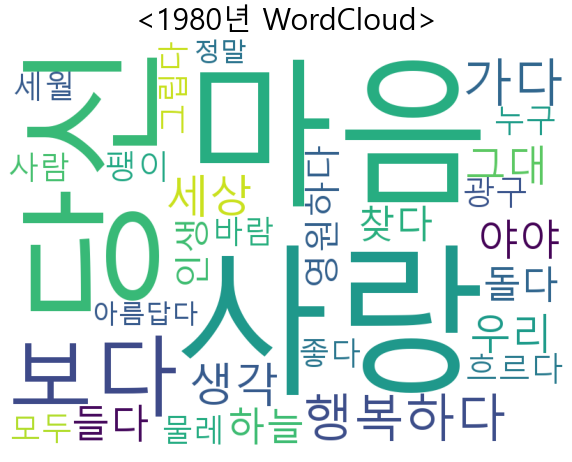

{'사랑': 61, '마음': 48, '당신': 34, '잊다': 34, '그대': 33, '가다': 32, '보다': 26, '사람': 23, '아름답다': 22, '하늘': 20, '가지마오': 19, '노래': 18, '바람': 16, '우리': 14, '다시': 13, '가슴': 12, '좋아하다': 12, '친구': 12, '버리다': 12, '외로워': 12, '겨울': 11, '기다리다': 11, '모습': 10, '웃음': 10, '눈물': 10, '옛날': 10, '하얗다': 10, '얼굴': 9, '홀로': 9, '좋다': 9}


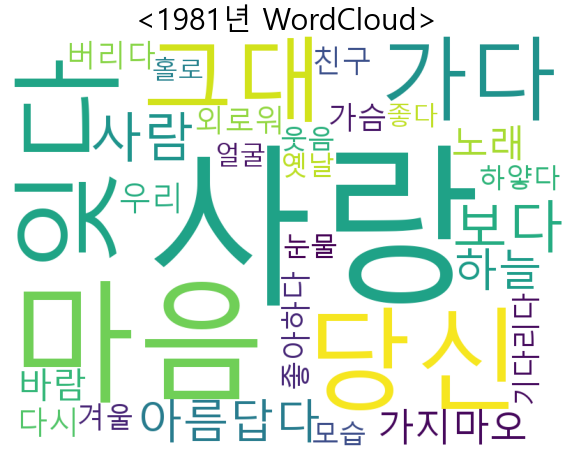

{'사랑': 79, '그대': 31, '보다': 30, '여인': 30, '노래': 28, '마음': 27, '당신': 24, '바람': 23, '떠나다': 22, '꾀꼬리': 22, '가슴': 21, '불다': 20, '구르다': 20, '버리다': 19, '울다': 19, '생각': 18, '오다': 17, '흐르다': 16, '잊다': 16, '눈물': 16, '사람': 14, '이제': 14, '다시': 13, '거리': 13, '찾다': 13, '바보': 12, '오늘': 11, '기다리다': 11, '우리': 11, '어디': 10}


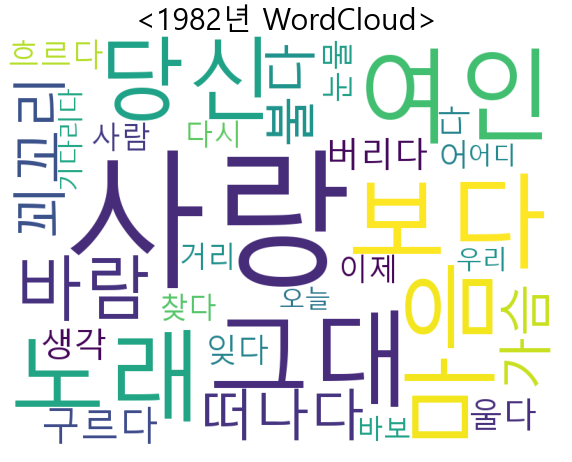

{'사랑': 94, '그대': 56, '사람': 41, '마음': 39, '가다': 34, '모습': 29, '보다': 28, '당신': 27, '인생': 27, '가슴': 24, '잊다': 23, '생각': 23, '모르다': 23, '되다': 22, '날아가다': 19, '모두': 19, '눈물': 18, '버리다': 17, '낙엽': 16, '돼다': 16, '바치다': 16, '그립다': 16, '하리': 15, '앉다': 15, '바람': 14, '우리': 14, '말다': 14, '천사': 14, '세상': 13, '하늘': 13}


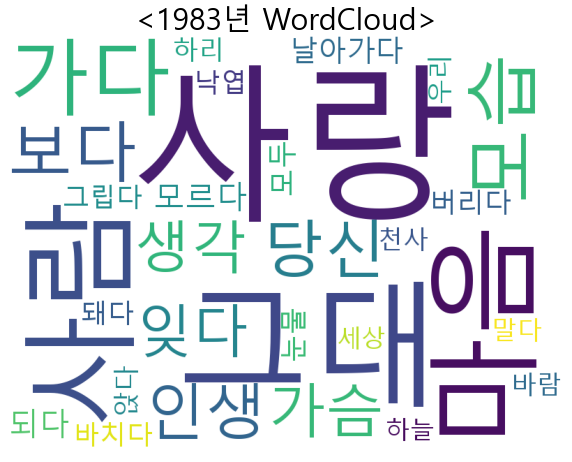

{'사랑': 79, '우리': 71, '그대': 65, '마음': 56, '나나': 49, '사람': 47, '아름답다': 34, '눈물': 32, '버리다': 27, '가슴': 26, '잊다': 25, '모습': 23, '슬프다': 23, '보다': 23, '당신': 22, '떠나다': 21, '찾다': 19, '그립다': 18, '가다': 18, '소리': 18, '이별': 17, '바람': 16, '모두': 16, '미우다': 16, '그렇다': 16, '모르다': 15, '말다': 15, '우린': 15, '그냥': 15, '내다': 15}


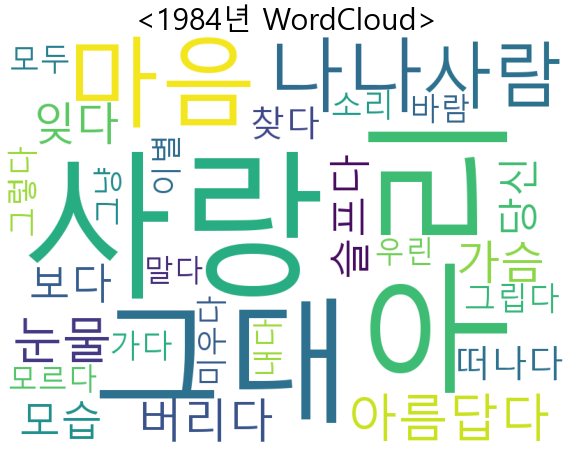

{'사랑': 134, '그대': 121, '마음': 49, '우리': 46, '가슴': 40, '떠나다': 39, '바람': 33, '잊다': 33, '눈물': 32, '사람': 30, '가다': 30, '이제': 23, '당신': 23, '생각': 21, '노래': 20, '모르다': 19, '작다': 19, '찾다': 18, '말다': 18, '젊다': 18, '같다': 17, '무엇': 16, '버리다': 16, '나르다': 16, '추억': 16, '간다': 16, '하나': 16, '내리다': 16, '젖다': 16, '슬픔': 15}


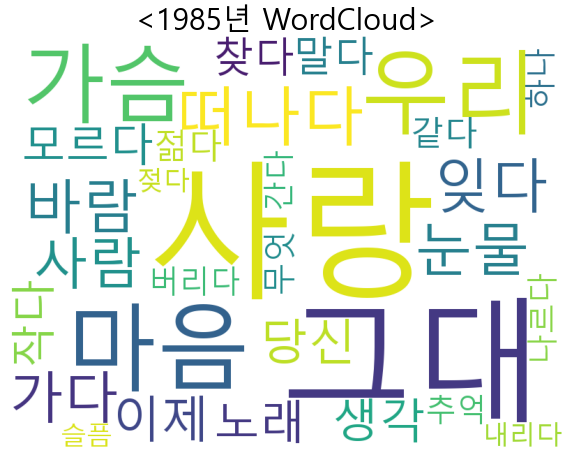

{'사랑': 107, '그대': 76, '간다': 62, '마음': 45, '보다': 43, '우리': 35, '가슴': 32, '당신': 29, '잊다': 25, '이제': 25, '떠나가다': 24, '눈물': 24, '세상': 24, '사람': 21, '모습': 20, '오다': 19, '가다': 18, '하나': 17, '모두': 17, '모르다': 16, '떠나다': 16, '다시': 16, '추억': 15, '나르다': 15, '슬픔': 15, '바람': 15, '하늘': 15, '되어다': 13, '깊다': 12, '말다': 12}


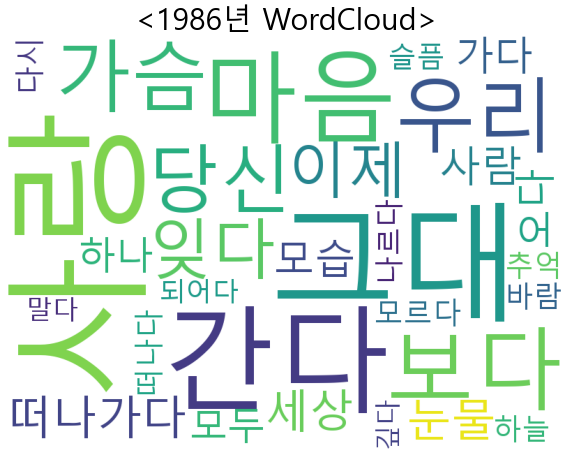

{'그대': 113, '사랑': 98, '마음': 49, '눈물': 41, '모습': 37, '보다': 35, '잊다': 33, '나르다': 32, '가슴': 29, '사람': 28, '슬프다': 28, '당신': 27, '되어다': 27, '이슬': 25, '떠나다': 23, '슬픔': 23, '모르다': 22, '우리': 22, '하늘': 21, '추억': 21, '소리': 21, '흐르다': 19, '가다': 18, '생각': 18, '이제': 18, '작다': 18, '바람': 17, '디제이': 17, '떠나가다': 17, '오다': 16}


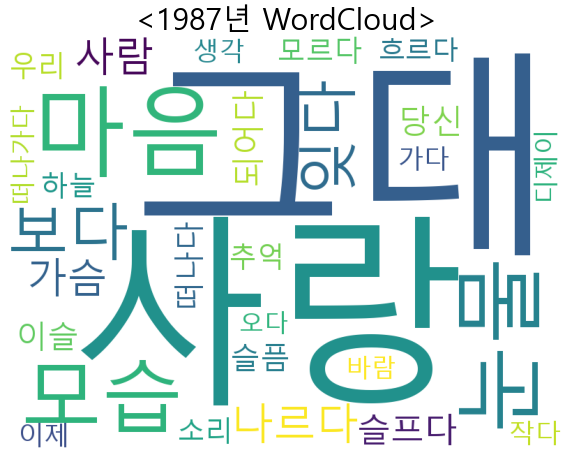

{'그대': 141, '사랑': 112, '잊다': 42, '모습': 39, '우리': 33, '마음': 30, '보다': 29, '멀리': 28, '같다': 24, '거리': 24, '가다': 23, '떠나다': 22, '흐르다': 22, '슬프다': 21, '돌아오다': 20, '서울': 20, '다시': 19, '당신': 19, '내다': 18, '모르다': 18, '나르다': 18, '오다': 17, '기다리다': 17, '가을': 17, '연인': 17, '눈물': 16, '만나다': 16, '기억': 16, '아름답다': 16, '뿜바': 16}


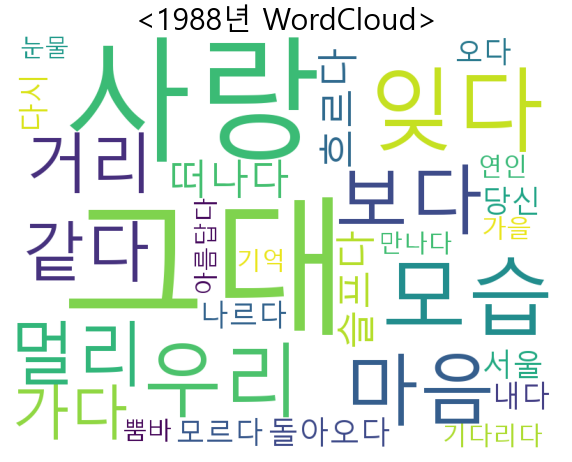

{'그대': 106, '사랑': 86, '보다': 47, '마음': 42, '잊다': 37, '삿갓': 30, '김삿갓': 29, '버리다': 28, '루루': 28, '아름답다': 27, '바람': 26, '당신': 24, '모습': 22, '우리': 22, '다시': 22, '모르다': 21, '오다': 20, '눈물': 20, '낙비': 20, '어디': 19, '같다': 17, '싶다': 17, '모두': 16, '흐르다': 16, '추억': 16, '떠나다': 16, '슬프다': 16, '가슴': 15, '하늘': 15, '이제': 15}


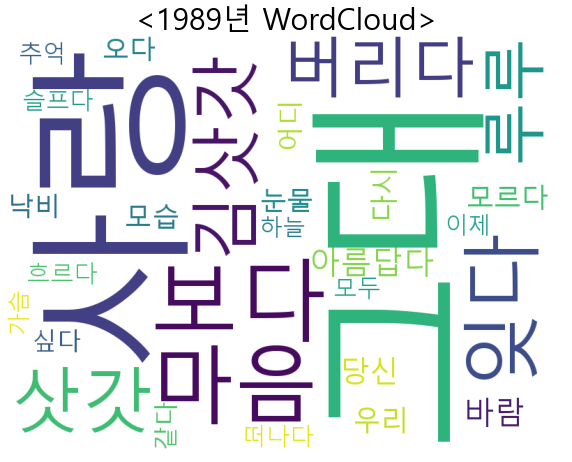

In [225]:
for year in range(1980,1990):
    draw_wordcloud(year)

###  
   - <b> 영어 가사 실종? </b>
       - 없는 건 아니었으나 wordcloud에 포함될 만큼 빈도수가 높지는 않음 ex) 겨울 아이 - happy birthday to you
       - 보편적으로 한국어를 쓰는 경향

### (2)-1 1980년대 전체 가사

{'사랑': 897, '그대': 758, '마음': 430, '보다': 309, '우리': 284, '잊다': 274, '당신': 269, '사람': 243, '가다': 220, '가슴': 218, '눈물': 213, '모습': 206, '바람': 185, '떠나다': 183, '버리다': 163, '아름답다': 155, '생각': 144, '모르다': 140, '나르다': 138, '흐르다': 135, '오다': 133, '슬프다': 130, '이제': 128, '하늘': 126, '모두': 123, '다시': 122, '노래': 112, '같다': 110, '추억': 105, '하나': 102}


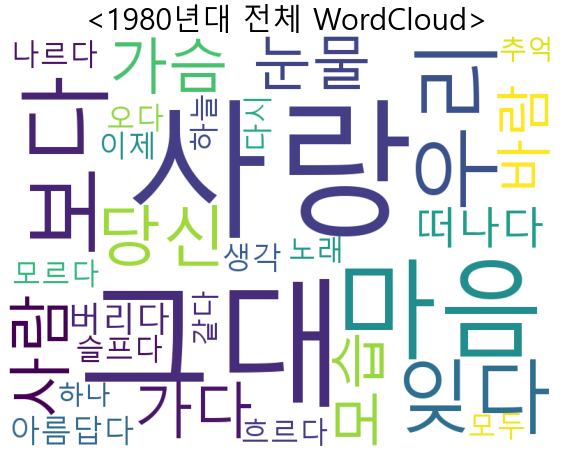

In [191]:
def draw_wordcloud_total():
    okt=Okt()
    sentences_tag=[]
    music_lyrics=list(musicDF['가사'])
    noun_adj_list=[]
    not_list=['하다','없다','있다','않다','이다'] # 의미 없다고 생각하는 동사 리스트

    for text in music_lyrics:
        for word in okt.pos(text, stem=True): # 어간 추출
            if word[1] in ['Noun','Verb','Adjective']: # 'Noun'-명사, 'Verb'-동사, 'Adjective'-형용사 
                if(len(word[0])>1) and (word[0] not in not_list): # 의미 없는 동사와 한 글자 단어들 빼줌 ex)나, 내, 그 등등
                    noun_adj_list.append(word[0])

        stopwords=set(STOPWORDS)

        # 영어 단어 추가 
        for word in text.split():
            if(isalphaenglish(word) and len(word)>1):
                noun_adj_list.append(word)

    # 형태소별 count
    counts=Counter(noun_adj_list)
    tags=counts.most_common(30) # 30개로 보여 주기로 정함

    # wordCloud생성
    # 한글 깨지는 문제 해결하기위해 font_path 지정
    if platform.system()=='Windows':
        path=r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()=='Darwin':  # Mac OS
        path=r'/System/Library/Fonts/AppleGothic'
    else:
        path=r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    wc=WordCloud(font_path=path, background_color='white', width=800, height=600)
    print(dict(tags))
    
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
        
    cloud=wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.title('<1980년대 전체 WordCloud>',size=30)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
draw_wordcloud_total()

###  - 1980년대 가사 키워드
   - <b><span style='color:royalblue'> 사랑, 그대, 마음   </span></b>
   - <b><span style='color:royalblue'> 서정적   </span></b>
   - <b><span style='color:royalblue'> 시대상 반영   </span></b>
       - 민주화운동 시기라 '우리', '눈물' 등의 단어는 사회 분위기를 반영한 것도 있음

### (3) 연도별 장르 분석

In [228]:
def draw_pie():
    # 전체 subplot의 개수 설정 (2x5=총10개)
    fig, axes=plt.subplots(2,5,figsize=(20,10),sharex=True,sharey=True)
    count=1
    for year in range(1980,1990):
        okt=Okt()
        sentences_tag=[]
        genre=list(musicDF[musicDF['연도']==year]['장르'].str.split(' / ')) # 연도별만 저장
        music_genres=[]
        
        for i in range(len(genre)):
            music_genres.append(genre[i][1])

        # 형태소 구분하여 리스트에 넣기
        for sentence in music_genres:
            morph=okt.pos(sentence)
            sentences_tag.append(morph)

        noun_adj_list=[]
        # 명사와 형용사만 구분하여 리스트에 넣기
        for sentence1 in sentences_tag:
            for word, tag in sentence1:
                if tag in ['Noun', 'Adjective']:
                    noun_adj_list.append(word)
                    
        # 형태소별 count
        counts=Counter(noun_adj_list)
        tags=counts.most_common(30) # 30개로 보여 주기로 정함

        # 그래프 한글 안 깨지게 폰트 설정
        if platform.system()=='Windows':
            plt.rc('font',family='Malgun Gothic')
        else:
            plt.rc('font',family='AppleGothic')

        genre_labels=dict(tags).keys()
        genre_values=dict(tags).values()
        #plt.figure(figsize=(10, 8))
        plt.subplot(2,5,count)
        plt.title('<{}년 장르별>'.format(year),size=15)
        textprops={'size':12}
        plt.pie(genre_values,labels=genre_labels,autopct='%.1f%%',textprops=textprops,startangle=90)
        #plt.legend(bbox_to_anchor=(0.5,0.5,0.7,0.5)) # 라벨 이름 가려서 범례 위치 따로 설정
        count+=1
    plt.show()

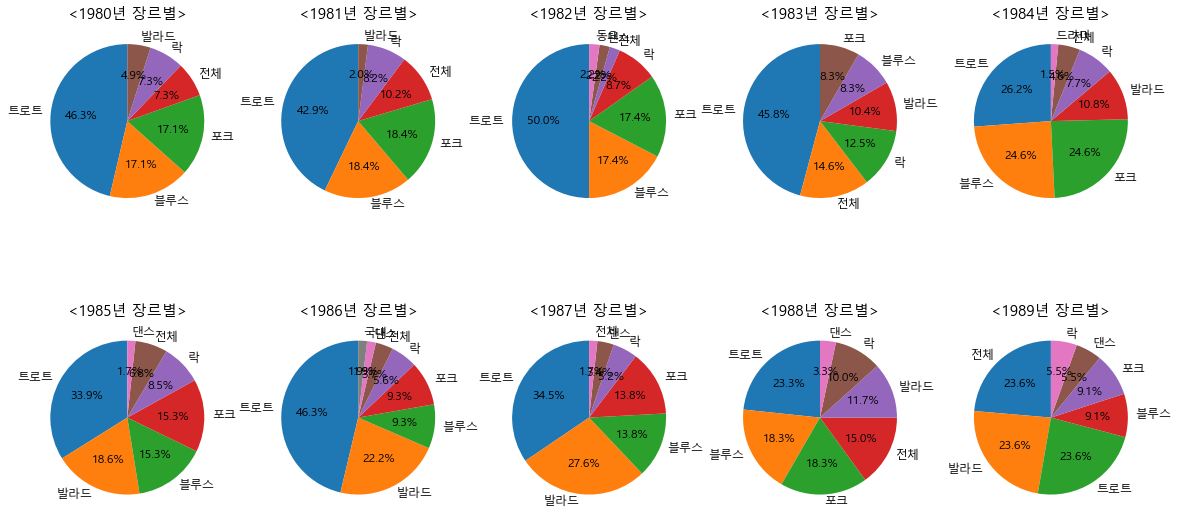

In [229]:
draw_pie()

### - 1980년대 장르 키워드
   - <b><span style='color:tomato'> 어차피 1위는 트로트   </span></b>
       - 국민의 흥을 북돋우고 대중의 심금을 울리며 한국 대중가요의 주류를 이루는 장르로 대접받음
   - <b><span style='color:tomato'> 발라드 비중 확대   </span></b>
       - 1983년부터 차지하는 비중이 점차 커지기 시작하더니 1989년도에는 트로트와 비중이 같아짐
       - 가장 중추적인 변화, 한국형 발라드를 완성했다는 점
       - 대표적인 가수: 이문세, 변진섭, 이선희 등
   - 바야흐로 <b><span style='color:tomato'> 다양화 시대   </span></b>
       - 1980년대 초반만 해도 대중음악의 구분은 단순했으나 중반 이후 발라드와 댄스 음악이 등장했고, 강변가요제, 대학가요제 등을 통해 록 음악이 인기

### <번외> 1980년대는 조용필 시대?

In [253]:
counts=Counter(musicDF['아티스트'])
artist=counts.most_common(1) # 1위 뽑기
print('아티스트: {}\nTop50에 들었던 노래 수: {}'.format(artist[0][0],artist[0][1]))

아티스트: 조용필
Top50에 들었던 노래 수: 26
